In [2]:
# STEP: IMPORT FUNCTIONS
import pandas as pd
from data_gathering import gather_data_features, gather_data_actuals
from data_exploration import calculate_correlation
from mappings import import_country_mapping
from data_visualization import global_scatter_plot

In [3]:
# STEP: LOAD DATA
# Load actuals data
data_cm_actual_2018, data_cm_actual_2019, data_cm_actual_2020, data_cm_actual_2021, data_cm_actual_allyears \
    = gather_data_actuals()

# Load features data
data_cm_features_2017, data_cm_features_2018, data_cm_features_2019, data_cm_features_2020, data_cm_features_allyears \
    = gather_data_features()


output_directory = r"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Baseline_Model"

crps_scores_all_year_country_specific = {}
crps_scores_all_year_global = {}
for year in [2015, 2016, 2017, 2018, 2019]:
    file_path = rf'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Baseline_Model\crps_scores_all_year_{year}_country_specific.parquet'
    crps_scores_all_year_country_specific[year] = pd.read_parquet(file_path)
    file_path = rf'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Baseline_Model\crps_scores_all_year_{year}_global.parquet'
    crps_scores_all_year_global[year] = pd.read_parquet(file_path)

crps_scores_all_year_country_specific_year_2015 = crps_scores_all_year_country_specific[2015]
crps_scores_all_year_country_specific_year_2016 = crps_scores_all_year_country_specific[2016]
crps_scores_all_year_country_specific_year_2017 = crps_scores_all_year_country_specific[2017]
crps_scores_all_year_country_specific_year_2018 = crps_scores_all_year_country_specific[2018]
crps_scores_all_year_country_specific_year_2019 = crps_scores_all_year_country_specific[2019]

crps_scores_all_year_global_year_2015 = crps_scores_all_year_global[2015]
crps_scores_all_year_global_year_2016 = crps_scores_all_year_global[2016]
crps_scores_all_year_global_year_2017 = crps_scores_all_year_global[2017]
crps_scores_all_year_global_year_2018 = crps_scores_all_year_global[2018]
crps_scores_all_year_global_year_2019 = crps_scores_all_year_global[2019]

country_mapping = import_country_mapping()

In [3]:
# STEP: DATA EXPLORATION
input_variables = \
    data_cm_features_allyears.columns.drop(['index', 'country_id', 'month_id', 'ged_sb']).tolist()
target_variables = \
    ['ged_sb', 'ged_sb_tlag_1', 'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6']
correlation_values = calculate_correlation(data_cm_features_allyears, target_variables=target_variables, input_variables=input_variables)



In [4]:
data_cm_features_allyears

,index,month_id,country_id,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,...,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5
0,0,121,1,110,0.0,0.0,0.0,0.0,0.0,0.0,...,43.141952,0.151779,27.952694,1.380676,3.333333,315260.986388,354505.092577,0.093750,1.034032,0.093750
1,1,121,2,115,0.0,0.0,0.0,0.0,0.0,0.0,...,20.844640,0.722621,57.289771,3.922495,2.950609,264606.831667,264606.831667,0.062500,0.062500,0.062500
2,2,121,3,52,0.0,0.0,0.0,0.0,0.0,0.0,...,42.245824,1.671158,35.755839,36.015231,17.956469,3244.939711,3244.939711,0.000000,0.000000,0.000000
3,3,121,4,101,0.0,0.0,12.0,0.0,0.0,0.0,...,159.866899,0.443153,28.946372,26.864392,2.249173,45295.968642,74555.476336,1.062500,1.062500,0.093750
4,4,121,5,990,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69345,2287,490,242,510,25.0,0.0,12.0,22.0,2.0,2.0,...,495.162649,0.164079,39.936434,6.594440,12.963241,1583.434859,1814.729450,4.737391,4.257646,2.228071
69346,2288,490,243,600,0.0,0.0,0.0,0.0,1.0,0.0,...,115.397918,0.374182,51.937737,7.966655,50.751212,825.592620,825.592620,0.985588,0.070187,0.085891
69347,2289,490,244,435,0.0,0.0,0.0,0.0,0.0,0.0,...,47.112502,0.294705,31.864675,3.627975,13.246217,96.072254,2738.059240,2.016126,1.119437,1.064569
69348,2290,490,245,625,0.0,102.0,3.0,1.0,1.0,28.0,...,158.054332,0.186767,52.712908,2.478948,118.656388,100.382863,948.618053,6.007088,4.954493,4.660780


In [5]:
data_cm_actual_allyears

,month_id,country_id,ged_sb
0,457,1,0.0
1,457,2,0.0
2,457,3,0.0
3,457,4,0.0
4,457,5,0.0
...,...,...,...
9163,504,242,7.0
9164,504,243,0.0
9165,504,244,0.0
9166,504,245,0.0


In [6]:
# Create a boolean mask of values with absolute value greater than or equal to 0.1
corr_threshold = 0.1
mask = correlation_values.abs() >= corr_threshold

# Apply the mask to the DataFrame to drop the values
correlation_values_filtered = correlation_values[mask]

correlation_values_filtered

,gleditsch_ward,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_os_tlag_1,wdi_ag_lnd_frst_k2,...,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5
ged_sb,NaN,0.130946,NaN,0.135350,0.144180,0.103538,0.507323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_1,NaN,0.154172,NaN,0.119778,0.167169,0.103707,0.516095,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_1,NaN,0.154172,NaN,0.119778,0.167169,0.103707,0.516095,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_2,NaN,0.157703,NaN,NaN,0.162207,0.124720,0.524598,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_2,NaN,0.157703,NaN,NaN,0.162207,0.124720,0.524598,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_3,NaN,0.155846,NaN,0.100031,0.159988,NaN,0.532322,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_3,NaN,0.155846,NaN,0.100031,0.159988,NaN,0.532322,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_4,NaN,0.150855,NaN,0.104170,0.164645,0.103942,0.537698,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_4,NaN,0.150855,NaN,0.104170,0.164645,0.103942,0.537698,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ged_sb_tlag_5,NaN,0.175545,NaN,NaN,0.156655,NaN,0.542447,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Understand spatial lag features**

In [7]:

country_neighbours = [1, 2, 4, 9]
data_cm_features_allyears[['month_id', 'country_id', 'vdem_v2x_libdem', 'vdem_v2x_libdem_48', 'splag_vdem_v2x_libdem']][(data_cm_features_allyears['country_id'].isin(country_neighbours)) & (data_cm_features_allyears['month_id'] == 121)]

,month_id,country_id,vdem_v2x_libdem,vdem_v2x_libdem_48,splag_vdem_v2x_libdem
0,121,1,0.214,0.179,1.762
1,121,2,0.590,0.190,0.793
3,121,4,0.593,0.594,1.106
8,121,9,0.579,0.248,4.062


**Understand decay function features**

In [17]:
country_neighbours = [1, 2, 4, 9]
data_cm_features_allyears[['month_id', 'country_id', 'ged_sb', 'decay_ged_sb_5', 'decay_ged_sb_100', 'decay_ged_sb_500']][(data_cm_features_allyears['country_id'] == 133)]

,month_id,country_id,ged_sb,decay_ged_sb_5,decay_ged_sb_100,decay_ged_sb_500
97,121,133,0.0,1.000000,0.943874,0.865537
264,122,133,54.0,0.971532,0.917004,0.840896
431,123,133,149.0,1.000000,0.890899,0.816958
600,124,133,39.0,1.000000,1.000000,0.793701
768,125,133,8.0,1.000000,0.971532,0.771105
...,...,...,...,...,...,...
68514,486,133,1455.0,1.000000,1.000000,1.000000
68705,487,133,3115.0,1.000000,1.000000,1.000000
68896,488,133,1380.0,1.000000,1.000000,1.000000
69087,489,133,1758.0,1.000000,1.000000,1.000000


In [18]:
country_neighbours = [1, 2, 4, 9]
data_cm_features_allyears[['month_id', 'country_id', 'ged_sb', 'decay_ged_sb_5', 'splag_1_decay_ged_sb_5' ]][(data_cm_features_allyears['country_id'].isin(country_neighbours)) & (data_cm_features_allyears['month_id'] == 121)]

,month_id,country_id,ged_sb,decay_ged_sb_5,splag_1_decay_ged_sb_5
0,121,1,0.0,0.03125,0.093750
1,121,2,0.0,0.03125,0.062500
3,121,4,0.0,0.03125,1.062500
8,121,9,0.0,0.03125,2.936654


Plot independent variables vs conflict fatalities in scatter plot

KeyboardInterrupt: 

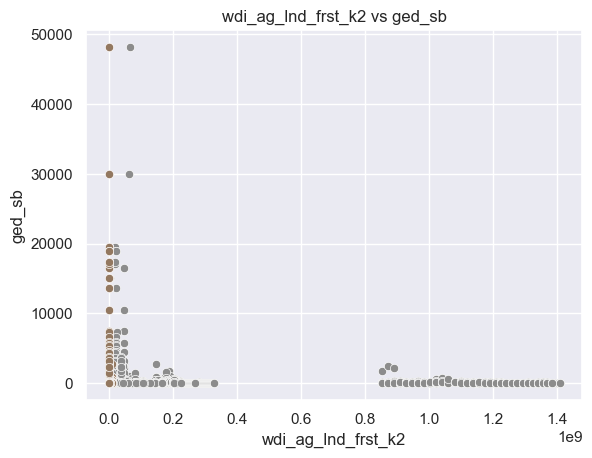

In [9]:
output_directory = r'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\scatterplots_global'
independent_variables = data_cm_features_allyears.columns.drop(['index', 'country_id', 'month_id', 'ged_sb']).tolist()
for independent_variable in independent_variables:
    global_scatter_plot(data_cm_features_allyears, independent_variable, 'ged_sb', output_directory, show=False, export=True)

Plot independent variables vs conflict fatalities in scatter plot for non zero conflict data

In [ ]:
output_directory_non_zero = r'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\scatterplots_global_non_zero'
independent_variables = data_cm_features_allyears.columns.drop(['index', 'country_id', 'month_id', 'ged_sb']).tolist()
data_cm_features_allyears_non_zero = data_cm_features_allyears[data_cm_features_allyears['ged_sb'] > 0]
for independent_variable in independent_variables:
    global_scatter_plot(data_cm_features_allyears_non_zero, independent_variable, 'ged_sb', output_directory_non_zero, show=False, export=True)

In [ ]:
data_cm_features_allyears['ged_sb'].describe()


In [ ]:
data_cm_features_allyears_non_zero['ged_sb'].describe()

In [ ]:
data_cm_features_allyears[['month_id', 'country_id', 'ged_sb', 'ged_sb_tlag_1', 'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_variable_distribution(df: pd.DataFrame, variable: str):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df, x=variable, ax=ax)
    ax.set_title(f'Distribution of {variable}')
    plt.show()

In [ ]:
plot_variable_distribution(data_cm_features_allyears, 'ged_sb')

In [ ]:
plot_variable_distribution(data_cm_features_allyears_non_zero, 'ged_sb')

In [ ]:
global_scatter_plot(data_cm_features_allyears_non_zero, 'wdi_sm_pop_refg_or', 'ged_sb', output_directory, show=True, export=False)

In [ ]:
data_cm_features_allyears_non_zero_big =  data_cm_features_allyears[data_cm_features_allyears['ged_sb'] > 5]

In [ ]:
plot_variable_distribution(data_cm_features_allyears_non_zero_big, 'ged_sb')

In [ ]:
import pymc as pm